# Práctica 2


Importar paquetes

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

In [3]:
file = "vivienda.csv"

Cargamos la tabla en un dataframe 



In [5]:
df = pd.read_csv(file, encoding='latin', low_memory=False)

In [6]:
df.head()

,folioviv,tipo_viv,condominio,elevador,mat_pared,mat_techos,mat_pisos,ais_techos,ais_pared,ais_ventan,...,tv_paga,auto_pick,tot_hog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor
0,100008010,1,,,8,9,3,2,2,2,...,2,1,1,10010000,000-0,1,4,8,1,221
1,100008034,1,,,8,9,3,1,2,2,...,1,1,1,10010000,000-0,1,4,8,1,221
2,100008077,1,,,8,9,3,9,9,2,...,1,1,1,10010000,000-0,1,4,8,1,221
3,100025016,1,,,8,9,3,1,2,2,...,2,1,1,10010000,000-0,1,3,7,2,194
4,100025022,1,,,8,9,3,2,2,2,...,1,1,1,10010000,000-0,1,3,7,2,194


In [7]:
df_copy = df.copy() #COPIA PARA NO REGARLA

In [8]:
df_copy.shape #DIMENSIONES

(56680, 110)

In [9]:
df_copy.shape[0] #LINEAS

56680

In [10]:
df_copy.shape[1] #COLUMNAS

110

In [11]:
df_copy.columns #COLNAMES

Index(['folioviv', 'tipo_viv', 'condominio', 'elevador', 'mat_pared',
       'mat_techos', 'mat_pisos', 'ais_techos', 'ais_pared', 'ais_ventan',
       ...
       'tv_paga', 'auto_pick', 'tot_hog', 'ubica_geo', 'ageb', 'tam_loc',
       'est_socio', 'est_dis', 'upm', 'factor'],
      dtype='object', length=110)

In [12]:
list(df_copy.columns) #LISTA COLUMNAS

['folioviv',
 'tipo_viv',
 'condominio',
 'elevador',
 'mat_pared',
 'mat_techos',
 'mat_pisos',
 'ais_techos',
 'ais_pared',
 'ais_ventan',
 'ais_otro',
 'antiguedad',
 'cocina',
 'cocina_dor',
 'cuart_dorm',
 'num_cuarto',
 'disp_agua',
 'dotac_agua',
 'excusado',
 'uso_compar',
 'sanit_agua',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'drenaje',
 'disp_elect',
 'anio_panel',
 'panel_ne',
 'pot_panel',
 'potencia',
 'focos_inca',
 'focos_ahor',
 'combustible',
 'estufa_chi',
 'eli_basura',
 'lavadero',
 'fregadero',
 'regadera',
 'rega_elect',
 'tinaco_azo',
 'cisterna',
 'pileta',
 'calent_sol',
 'calent_gas',
 'medidor_luz',
 'bomba_agua',
 'tanque_gas',
 'aire_acond',
 'calefacc',
 'chimenea',
 'repar_pard',
 'repar_tech',
 'repar_agua',
 'repar_dren',
 'repar_cabl',
 'const_dorm',
 'const_coci',
 'const_bano',
 'const_neg',
 'comun1',
 'comun2',
 'comun3',
 'comun4',
 'comun5',
 'comun6',
 'comun7',
 'comun8',
 'comun9',
 'estaciona',
 'comun10',
 'comun11',
 'comun12',
 'comun

In [13]:
df_copy['tel_fijo'].value_counts() #VALORES DE COLUMNA

2    37355
1    19325
Name: tel_fijo, dtype: int64

In [14]:
df_copy['tel_fijo'].unique() #UNIQUES

array([1, 2], dtype=int64)

In [15]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  folioviv
TIPO:  entero
NUNIQUE:  56680
UNIQUE:  [ 100008010  100008034  100008077 ... 3260737208 3260737210 3260737211]
VALUE COUNTS  1412184057    1
3060078007    1
2900807116    1
3202046090    1
3200448001    1
             ..
1901026056    1
502425042     1
300437027     1
504127009     1
2701787136    1
Name: folioviv, Length: 56680, dtype: int64


COLUMNA:  tipo_viv
TIPO:  otro
NUNIQUE:  6
UNIQUE:  ['1' '2' '3' '&' '4' '5']
VALUE COUNTS  1    53650
2     2416
3      482
&      114
4       12
5        6
Name: tipo_viv, dtype: int64


COLUMNA:  condominio
TIPO:  otro
NUNIQUE:  19
UNIQUE:  [' ' '04' '02' '03' '05' '07' '22' '06' '08' '12' '09' '13' '10' '11' '16'
 '15' '14' '24' '23']
VALUE COUNTS        54150
02     1065
03      594
04      494
05      268
06       53
07       26
12        7
08        5
09        4
10        4
11        3
22        1
16        1
13        1
15        1
14        1
24        1
23        1
Name: condominio, dtype: int64


COLUMNA:  elevador

VALUE COUNTS  2    45549
1    11131
Name: cisterna, dtype: int64


COLUMNA:  pileta
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  2    34699
1    21981
Name: pileta, dtype: int64


COLUMNA:  calent_sol
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 2]
VALUE COUNTS  2    53482
1     3198
Name: calent_sol, dtype: int64


COLUMNA:  calent_gas
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 2]
VALUE COUNTS  2    33894
1    22786
Name: calent_gas, dtype: int64


COLUMNA:  medidor_luz
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 2]
VALUE COUNTS  1    53313
2     3367
Name: medidor_luz, dtype: int64


COLUMNA:  bomba_agua
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 2]
VALUE COUNTS  2    42787
1    13893
Name: bomba_agua, dtype: int64


COLUMNA:  tanque_gas
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  2    51205
1     5475
Name: tanque_gas, dtype: int64


COLUMNA:  aire_acond
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  2    45363
1    11317
Name: aire_acond, dtype: int64


COLUMNA:  calefacc
TIP

VALUE COUNTS       56438
2      242
Name: financia_2, dtype: int64


COLUMNA:  financia_3
TIPO:  otro
NUNIQUE:  2
UNIQUE:  ['3' ' ']
VALUE COUNTS       49748
3     6932
Name: financia_3, dtype: int64


COLUMNA:  financia_4
TIPO:  otro
NUNIQUE:  2
UNIQUE:  [' ' '4']
VALUE COUNTS       55089
4     1591
Name: financia_4, dtype: int64


COLUMNA:  financia_5
TIPO:  otro
NUNIQUE:  2
UNIQUE:  [' ' '5']
VALUE COUNTS       56490
5      190
Name: financia_5, dtype: int64


COLUMNA:  financia_6
TIPO:  otro
NUNIQUE:  2
UNIQUE:  [' ' '6']
VALUE COUNTS       56321
6      359
Name: financia_6, dtype: int64


COLUMNA:  financia_7
TIPO:  otro
NUNIQUE:  2
UNIQUE:  [' ' '7']
VALUE COUNTS       55794
7      886
Name: financia_7, dtype: int64


COLUMNA:  financia_8
TIPO:  otro
NUNIQUE:  2
UNIQUE:  [' ' '8']
VALUE COUNTS       55236
8     1444
Name: financia_8, dtype: int64


COLUMNA:  num_dueno1
TIPO:  otro
NUNIQUE:  12
UNIQUE:  ['01' ' ' '02' '03' '05' '04' '07' '11' '06' '09' '08' '10']
VALUE COUNTS  01 

COLUMNA:  factor
TIPO:  entero
NUNIQUE:  1776
UNIQUE:  [ 221  194  190 ... 1102 1050 1245]
VALUE COUNTS  184     187
133     182
203     178
122     167
157     165
       ... 
932       2
1677      1
2320      1
1726      1
2076      1
Name: factor, Length: 1776, dtype: int64




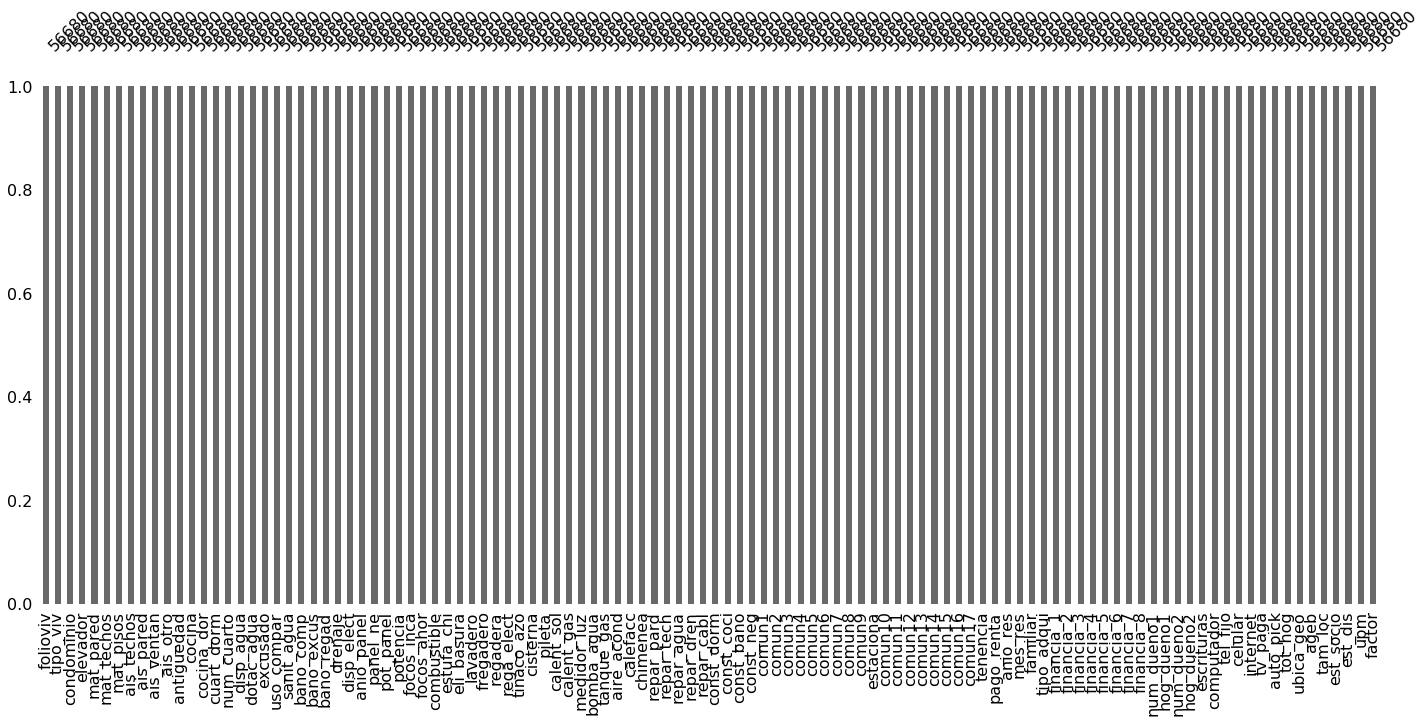

In [16]:
msno.bar(df_copy) 

In [17]:
df_copy.isnull().any().any() #CHECAMOS NULOS

False

In [18]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True) #& VACIOS POR NA

In [19]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)#VACIOS VACIOS POR NA

In [20]:
df_copy.isnull().any().any() #REAFIRMAMOS NULOS

True

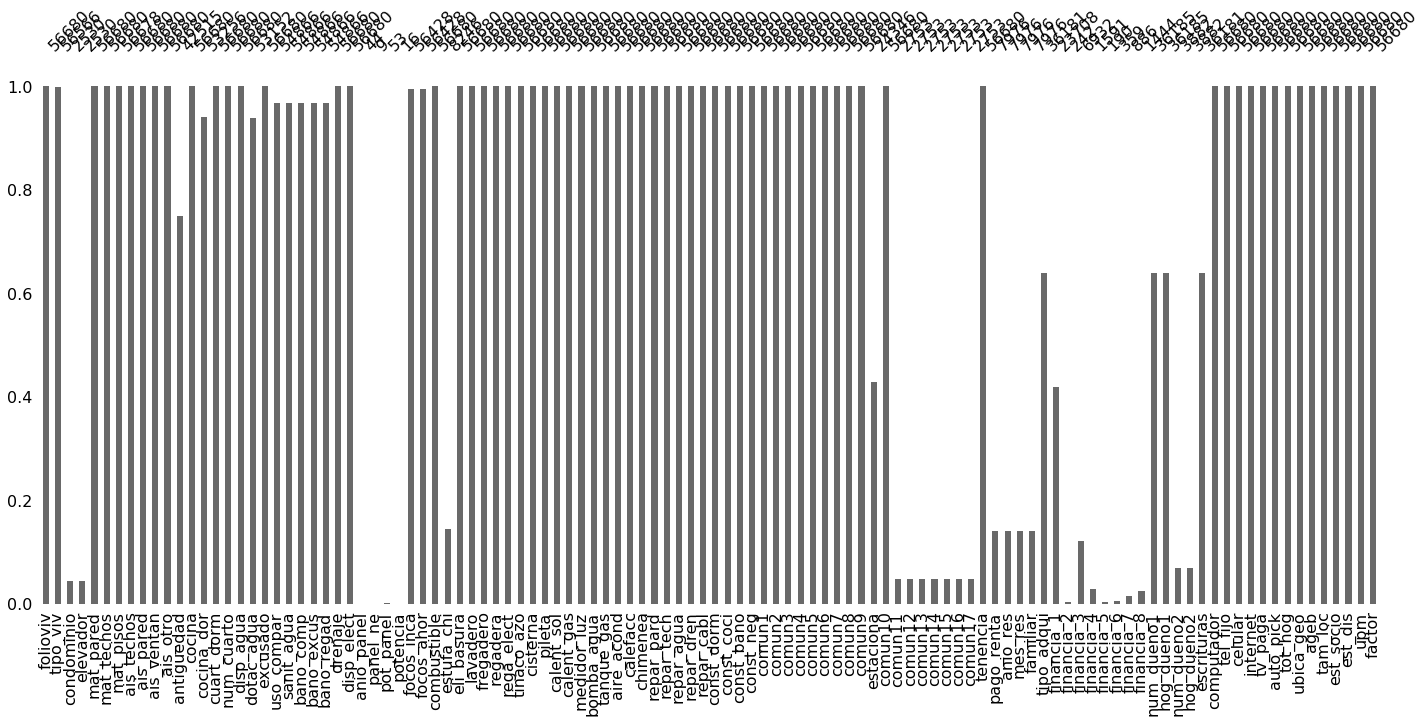

In [21]:
msno.bar(df_copy)

In [22]:
file = 'vivienda_load.csv'

In [23]:
df_copy.to_csv(file)

Limpieza

In [24]:
df_copy.fillna(value=-1, inplace=True)

In [25]:
threshold = round(df_copy.shape[0]*.75)
threshold

42510

In [26]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

tipo_viv :  56566  -  42510
condominio :  2530  -  42510
condominio :  d e l e t e d
elevador :  2530  -  42510
elevador :  d e l e t e d
mat_pisos :  56678  -  42510
antiguedad :  42515  -  42510
cocina_dor :  53256  -  42510
dotac_agua :  53152  -  42510
uso_compar :  54866  -  42510
sanit_agua :  54866  -  42510
bano_comp :  54866  -  42510
bano_excus :  54866  -  42510
bano_regad :  54866  -  42510
anio_panel :  44  -  42510
anio_panel :  d e l e t e d
panel_ne :  9  -  42510
panel_ne :  d e l e t e d
pot_panel :  53  -  42510
pot_panel :  d e l e t e d
potencia :  16  -  42510
potencia :  d e l e t e d
focos_inca :  56428  -  42510
focos_ahor :  56428  -  42510
estufa_chi :  8246  -  42510
estufa_chi :  d e l e t e d
estaciona :  24346  -  42510
estaciona :  d e l e t e d
comun11 :  2753  -  42510
comun11 :  d e l e t e d
comun12 :  2753  -  42510
comun12 :  d e l e t e d
comun13 :  2753  -  42510
comun13 :  d e l e t e d
comun14 :  2753  -  42510
comun14 :  d e l e t e d
comun15 

In [27]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [28]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

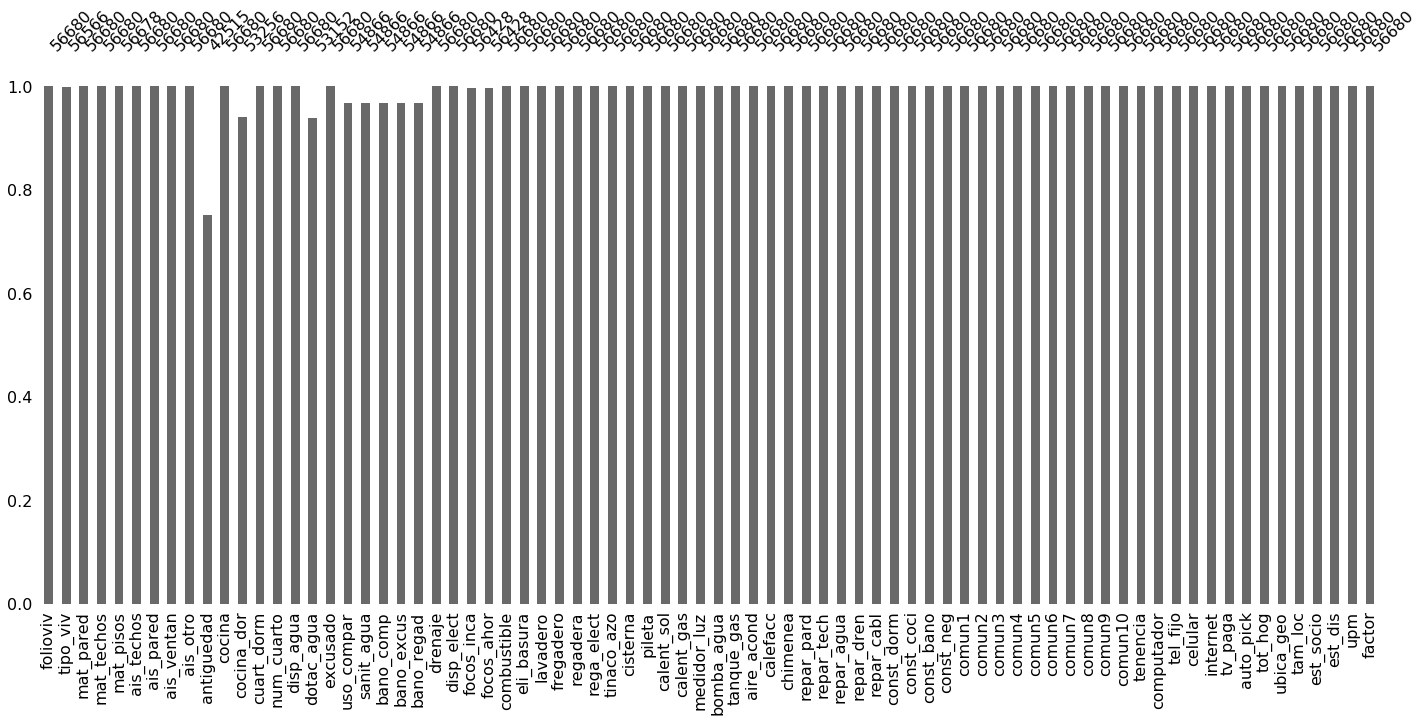

In [29]:
msno.bar(df_copy)

In [30]:
file = 'vivienda_clean.csv' #GUARDAMOS DATAFRAME LIMPIADO

In [31]:
df_copy.to_csv(file)